reading, storing, and plotting data

In [44]:
import matplotlib.pyplot as plt
import random as rnd
from math import dist
"""
Functions:
"""
# ----- read and clean datapoints -----
def generate_data_from_file():

    file_path = "assets/datapoints.txt"

    with open(file_path, "r") as file_r:
        datapoints = [row.strip("\n").split(", ") for row in file_r] # split each row into a list of 3 elements, remove newlines, and store list as element in datapoints list
        datapoints.remove(datapoints[0]) # remove column header
        datapoints = [[float(element) for element in point] for point in datapoints]

    data = { # dictionary containing all pokemon, and their width/height measurements
        "pikachu" : {
        "width"   : [i[0] for i in datapoints if i[2] == 1],
        "height"  : [i[1] for i in datapoints if i[2] == 1]
        },
        "pichu"   : {
        "width"   : [i[0] for i in datapoints if i[2] == 0],
        "height"  : [i[1] for i in datapoints if i[2] == 0]
        }
    }

    return data

# ----- read and clean testpoints -----
def generate_test_data_from_file():

    file_path = "assets/testpoints.txt"

    with open(file_path, "r") as file_r:
        testpoints = [row[4:-2].split(", ") for row in file_r]
        testpoints.remove(testpoints[0])
        testpoints = [[float(element) for element in point] for point in testpoints]

    # test_data = { # TODO better to use a separate dictionary for unclassified datapoints?
    #     "width"   : [i[0] for i in testpoints],
    #     "height"  : [i[1] for i in testpoints]
    # }

    test_data = [[i[0], i[1]] for i in testpoints]

    return test_data
        
# ----- plot data from datapoints -----
def plot_data(data):
    plt.scatter(data["pikachu"]["width"],  data["pikachu"]["height"], color = "orange", label = "Pikachus")
    plt.scatter(data["pichu"]["width"],    data["pichu"]["height"],   color = "black",  label = "Pichus")

    plt.title("Scatterplot of width / height measurements of pokemon")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.legend();

# ----- error handling of user input -----
def clean_user_input():
    while True:
        user_input = input("Enter a manual point to classify, formatted like 'width, height' (x, y):")
        print(user_input)
        try:
            user_input = user_input.split(",")
            user_input = [float(i.strip()) for i in user_input] # remove empty space

            if len(user_input) > 2:
                print("Make sure to enter a point with 2 values")

            x = user_input[0]
            y = user_input[1]

            if len(user_input) == 3: # to enter majority vote number
                z = user_input[2]

            print(x)
            print(y)

            if len(user_input) == 3:
                return x, y, z # TODO implement 'z' as majority vote number to pass into distance function

            return x, y
            
        except ValueError as err:
            print(f"{err} is not a valid point, make sure to enter numbers")

# ----- calculate euclidean distance between data and test points -----
def categorize_point(point, data, amount_votes = 1):

    distance_list = []

    for i in range(len(data["pikachu"]["width"])): # calculate distance between all pikachu / pichu points and (x, y), and store them in distance
        distance_list.append([dist((data["pikachu"]["width"][i], data["pikachu"]["height"][i]), (point[0], point[1])), "pikachu"])
        distance_list.append([dist((data["pichu"]["width"][i], data["pichu"]["height"][i]), (point[0], point[1])), "pichu"])

    distance_list.sort() # sort distance, this sorts on the first index of lists in distance list, and keeps the pokemon tag

    del distance_list[amount_votes::] # remove indices of distance outside the votes specified to be taken into consideration
    
    category = ""
    certainty = 0

    distance_pikachu = [distance[0] for distance in distance_list if distance[1] == "pikachu"]
    distance_pichu = [distance[0] for distance in distance_list if distance[1] == "pichu"]

    # TODO update weighting calculation of results for better accuracy

    # ----- avoid division by 0 if one pokemon is not represented in votes -----
    if len(distance_pichu) == 0:
        category = "pikachu"
        certainty = 100
        return category, certainty

    elif len(distance_pikachu) == 0:
        category = "pichu"
        certainty = 100
        return category, certainty

    # ----- calculate weight if results are mixed -----
    weight_pikachu = sum(distance_pikachu) / len(distance_pikachu)
    weight_pichu = sum(distance_pichu) / len(distance_pichu)
    print(f"\n{distance_list}")
    print(f"Pika: weight = {weight_pikachu}, amount = {len(distance_pikachu)},\nPichu: weight = {weight_pichu}, amount = {len(distance_pichu)}")

    if weight_pikachu < weight_pichu:
        category = "pikachu"
        certainty = weight_pichu / (weight_pikachu + weight_pichu)
        return category, certainty

    else:
        category = "pichu"
        certainty = weight_pikachu / (weight_pichu + weight_pikachu)
        return category, certainty

# ----- randomly split data into test and training data -----
def generate_test_training_data(data):

    training_data   = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}
    test_data       = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}

    for i in range(25): # 50 datapoints for test_data (25 pikachu, 25 pichu)
        # TODO inclusive range?
        random_point = rnd.sample(range(0, 75), 25) # TODO better to do random twice, once for pichu and once for pikachu so that results are not paired based on index
        test_data["pikachu"]["width"].append(data["pikachu"]["width"][random_point[i]])
        test_data["pikachu"]["height"].append(data["pikachu"]["height"][random_point[i]])

        random_point_pichu = rnd.sample(range(0, 75), 25) # second random here for pichu randoms
        test_data["pichu"]["width"].append(data["pichu"]["width"][random_point_pichu[i]])
        test_data["pichu"]["height"].append(data["pichu"]["height"][random_point_pichu[i]])

    training_data["pikachu"]["width"] = [data["pikachu"]["width"][i] for i in range(75) if i not in random_point]
    training_data["pikachu"]["height"] = [data["pikachu"]["height"][i] for i in range(75) if i not in random_point]

    training_data["pichu"]["width"] = [data["pichu"]["width"][i] for i in range(75) if i not in random_point_pichu]
    training_data["pichu"]["height"] = [data["pichu"]["height"][i] for i in range(75) if i not in random_point_pichu]

    return test_data, training_data # to use in functions

# ----- calculate accuracy of calculations by comparing generated test and training data -----
def calculate_accuracy(input_dict):

    TP, TN, FP, FN = 0, 0, 0, 0

    for i in range(len(input_dict["pikachu"]["width"])):

        res = compare_distance(input_dict["pikachu"]["width"][i], input_dict["pikachu"]["height"][i], 1)
        if "Pikachu" in res:
            TP += 1
        else:
            FP += 1
        
        res = compare_distance(input_dict["pichu"]["width"][i], input_dict["pichu"]["height"][i], 1)
        if "Pichu" in res:
            TN += 1
        else:
            FN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return accuracy


## Read data from file and store in data structure

In [40]:
data = generate_data_from_file()
test_data = generate_test_data_from_file()

## Read data from file and plot datapoints

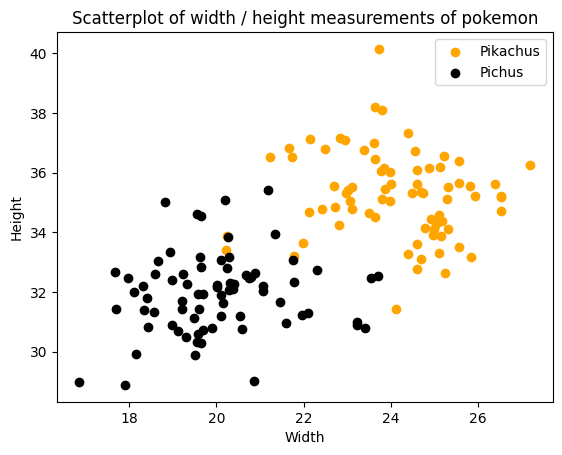

In [41]:
data = generate_data_from_file()
plot_data(data)

## Calculate distance between datapoints and testpoints  
## Classify calculated distance as pokemon type

In [47]:
data = generate_data_from_file()
test_data = generate_test_data_from_file()

print(test_data)

for point in test_data:
    print(categorize_point(point, data, 10))

[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]

[[0.6829635758323601, 'pikachu'], [0.8829834980050161, 'pikachu'], [1.0623655711316322, 'pikachu'], [1.1483506635878935, 'pikachu'], [1.3042926733824605, 'pikachu'], [1.4059385714272348, 'pichu'], [1.4214199522923856, 'pikachu'], [1.4277016205320443, 'pikachu'], [1.5334840155713727, 'pichu'], [1.6220435525527013, 'pikachu']]
Pika: weight = 1.1940151384145616, amount = 8,
Pichu: weight = 1.4697112934993037, amount = 2
('pikachu', 0.5517500881062056)

[[0.12078857390630211, 'pikachu'], [1.0582437258984485, 'pichu'], [1.1038572544225178, 'pichu'], [1.144071642679935, 'pichu'], [1.1622608231748421, 'pichu'], [1.1764205836884245, 'pichu'], [1.3494302017035518, 'pikachu'], [1.540570186049894, 'pikachu'], [1.6769219846042458, 'pikachu'], [1.792605252626006, 'pikachu']]
Pika: weight = 1.2960632397779999, amount = 5,
Pichu: weight = 1.1289708059728336, amount = 5
('pichu', 0.5344515645250315)

[[0.3542396645807628, 'pikachu'], [0.6519647

## Read and classify manual user input

In [ ]:
user_input = clean_user_input()
distance = compare_distance(user_input[0], user_input[1])
print(distance)

1.5 , 5.41232565
1.5
5.41232565
('pichu', 1.0)


## Classify test data, majority vote of 10

In [ ]:
for i in range(len(test_data["width"])):
    out_data = compare_distance(test_data["width"][i], test_data["height"][i], 10)
    print(out_data[0], out_data[1]) # [0] pokemon, [1] certainty

pikachu 0.8
unknown 0.5
pikachu 0.7
pichu 0.8


In [ ]:
test = generate_test_training_data()
print(test)

{'pikachu': {'width': [26.388368121945867, 25.813562951888365, 24.111063562798908, 24.59096971887165, 25.5491811833759, 24.387651550868913, 23.02865997158701, 22.723629043769336, 23.062887108583702, 23.868174335146136, 26.525412887538252, 21.989953947825015, 25.922634453956498, 23.631672104136165, 25.311244044578427, 24.68867147060795, 25.023623126719983, 26.517189386365075, 22.723629043769336, 22.826788929142136, 22.723629043769336, 22.493387946548573, 22.943474306364404, 26.5173046073707, 25.23472228644244], 'height': [35.62090746957761, 35.561029988644336, 31.418267572382227, 33.61859674823029, 33.52624549604696, 33.2827564295772, 35.4082866561793, 34.83845262048311, 35.04075442599907, 35.449698119416254, 35.2192205449002, 33.64590281447322, 35.2215760062586, 34.52980905331491, 34.117212558131975, 35.363481550256644, 34.28266788814326, 34.7011323493234, 34.83845262048311, 37.16482263385777, 34.83845262048311, 36.78517041843648, 37.07911595862419, 35.18452932633369, 32.64136159392417